In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Importation des données

In [2]:
dataset=pd.read_csv('pred.csv')
dataset.head(8)

,ENERGYSTARScore,NumberofBuildings,YearBuilt,NumberofFloors,PropertyGFAParking,SiteEnergyUse(kBtu),TotalGHGEmissions
0,60.0,1.0,1927,12,0,7226362.5,249.98
1,61.0,1.0,1996,11,15064,8387933.0,295.86
2,43.0,1.0,1969,41,196718,72587024.0,2089.28
3,56.0,1.0,1926,10,0,6794584.0,286.43
4,75.0,1.0,1980,18,62000,14172606.0,505.01
5,75.0,1.0,1999,2,37198,12086616.0,301.81
6,27.0,1.0,1926,11,0,5758795.0,176.14
7,75.0,1.0,1926,8,0,6298131.5,221.51


# Entrainement du modèle et évaluation des performances

In [3]:
x=dataset.drop(columns=["TotalGHGEmissions"]).values
y=dataset[["TotalGHGEmissions"]]
sc=StandardScaler()
sc.fit(x)
X=sc.transform(x)

# DummyRegressor

In [4]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25 ,random_state=42)
from sklearn.dummy import DummyRegressor
dummy_regr = DummyRegressor(strategy='mean')
dummy_regr.fit(X_train, y_train)
y_pred = dummy_regr.predict(X_test)

In [5]:
r2=r2_score(y_test,y_pred)
r2

-0.00011151581434099

In [6]:
from math import sqrt
mse=mean_squared_error(y_test,y_pred)
rmse=sqrt(mse)
rmse

703.1928160850371

In [7]:
print("DummyRegressor")
print('R2 :', r2)
print('RMSE :', rmse)

DummyRegressor
R2 : -0.00011151581434099
RMSE : 703.1928160850371


# Linear Regressor

In [8]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# split your data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# create an instance of each model
lin_reg = LinearRegression()
ridge = Ridge()
lasso = Lasso()
elasticnet = ElasticNet()
# define the hyperparameters to tune for each model
lin_reg_param = {}
ridge_param = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso_param = {'alpha': [0.01, 0.1, 1, 10, 100]}
elasticnet_param = {'alpha': [0.01, 0.1, 1], 'l1_ratio': [0.1, 0.5, 0.9]}

# create a dictionary of the models and their corresponding hyperparameters
models = {'Linear Regression': lin_reg, 'Ridge': ridge, 'Lasso': lasso, 'ElasticNet': elasticnet}
params = {'Linear Regression': lin_reg_param, 'Ridge': ridge_param, 'Lasso': lasso_param, 'ElasticNet': elasticnet_param}

# create an instance of the GridSearchCV class for each model
grid_lin_reg = GridSearchCV(estimator=LinearRegression(), param_grid=lin_reg_param, cv=5, scoring='r2')
grid_ridge = GridSearchCV(estimator=Ridge(), param_grid=ridge_param, cv=5, scoring='r2')
grid_lasso = GridSearchCV(estimator=Lasso(), param_grid=lasso_param, cv=5, scoring='r2')
grid_elasticnet = GridSearchCV(estimator=ElasticNet(), param_grid=elasticnet_param, cv=5, scoring='r2')

# fit each GridSearchCV object to your training data
grid_lin_reg.fit(X_train, y_train)
grid_ridge.fit(X_train, y_train)
grid_lasso.fit(X_train, y_train)
grid_elasticnet.fit(X_train, y_train)

# store the best hyperparameters for each model
best_params = {'Linear Regression':grid_lin_reg.best_params_,
               'Ridge':grid_ridge.best_params_,
               'Lasso':grid_lasso.best_params_,
               'ElasticNet':grid_elasticnet.best_params_}

# store the best model for each algorithm
best_models = {'Linear Regression':grid_lin_reg.best_estimator_,
               'Ridge':grid_ridge.best_estimator_,
               'Lasso':grid_lasso.best_estimator_,
               'ElasticNet':grid_elasticnet.best_estimator_}

# store the best score for each algorithm
best_score = {'Linear Regression':grid_lin_reg.best_score_,
               'Ridge':grid_ridge.best_score_,
               'Lasso':grid_lasso.best_score_,
               'ElasticNet':grid_elasticnet.best_score_}

# evaluate the best model on the test set
best_model = max(best_score, key=best_score.get)
best_estimator = best_models[best_model]
y_pred = best_estimator.predict(X_test)

# calculate MSE, RMSE, and R2 
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Create a dataframe with the results
results = pd.DataFrame({'Model': models.keys(),
                       'Best Hyperparameters': best_params.values(),
                       'Best Score': [b for b in best_score.values()]
                       
                      })

# Print the dataframe
print(results)

               Model           Best Hyperparameters  Best Score
0  Linear Regression                             {}    0.353660
1              Ridge                 {'alpha': 100}    0.489478
2              Lasso                 {'alpha': 100}    0.501150
3         ElasticNet  {'alpha': 1, 'l1_ratio': 0.5}    0.588409


# Importance des valeurs uilisant SHAP

/Users/joly/opt/anaconda3/envs/MachineLearning/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


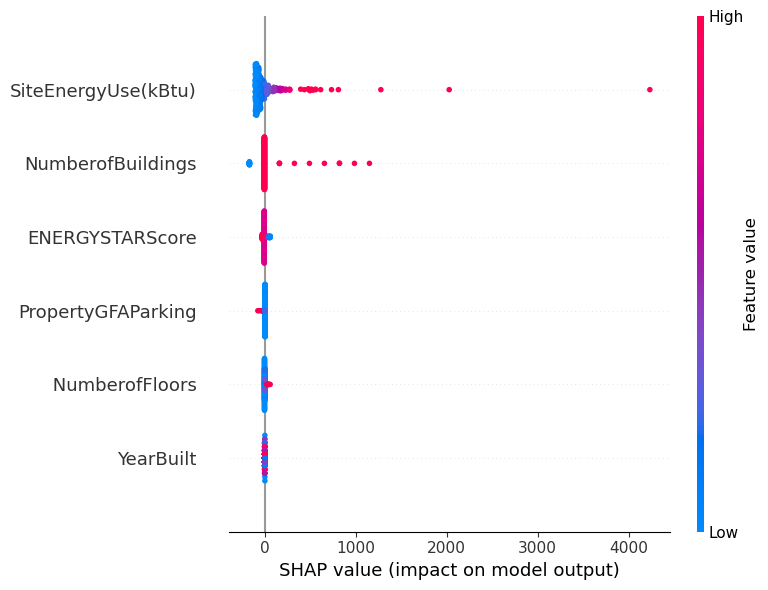

In [9]:
import shap
model = ElasticNet(alpha=1, l1_ratio=0.5).fit(X_train, y_train)
# create the explainer
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Convert X_test to a Pandas DataFrame
X_test_df = pd.DataFrame(X_test, columns=["ENERGYSTARScore","NumberofBuildings", "YearBuilt", " NumberofFloors","PropertyGFAParking","SiteEnergyUse(kBtu)"])


# Get the feature names
feature_names = X_test_df.columns

# Plot the summary plot with feature names
shap.summary_plot(shap_values, X_test_df, feature_names=feature_names,
                  plot_type='dot', color='royalblue',
                  title='SHAP Values Summary Plot',
                  show=False, plot_size=(8,6))


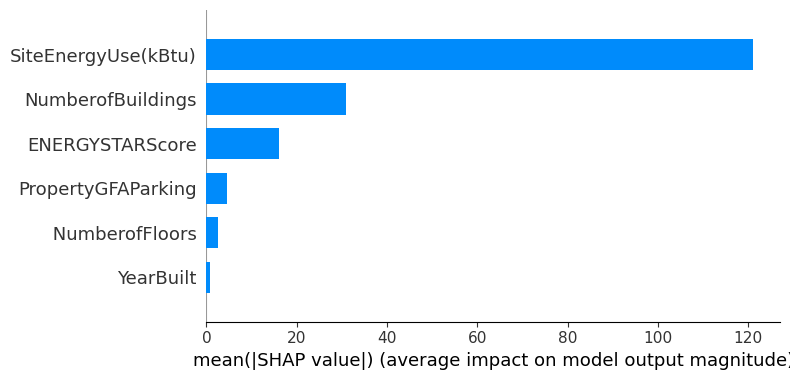

In [10]:
shap.summary_plot(shap_values, X_test_df,feature_names=feature_names,plot_type='bar')

# Importance des valeurs utilisant Lime

In [11]:
import lime

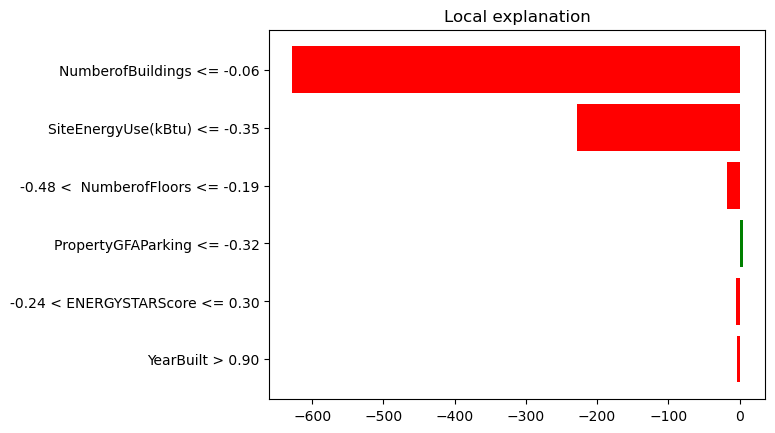

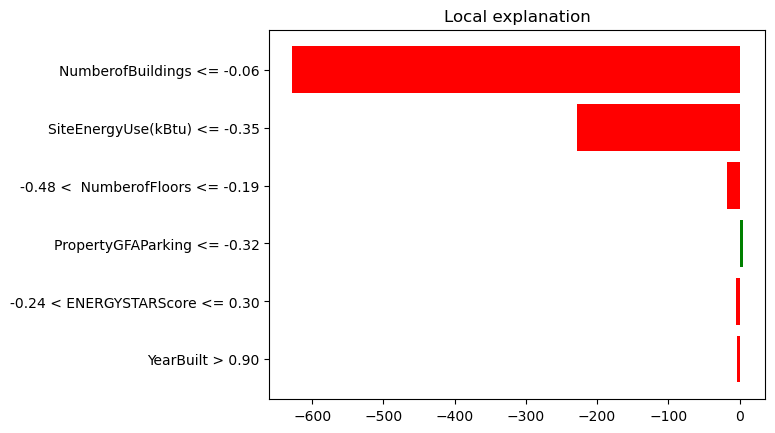

In [12]:
import lime
import lime.lime_tabular

# Train ElasticNet model
reg = ElasticNet(alpha=1, l1_ratio=0.5 ,random_state=0)
reg.fit(X_train, y_train)

# Convert the data into a Pandas DataFrame
data = pd.DataFrame(X_test, columns=["ENERGYSTARScore","NumberofBuildings", "YearBuilt", " NumberofFloors","PropertyGFAParking","SiteEnergyUse(kBtu)"])

# Create an instance of LIME's LimeTabularExplainer
explainer = lime.lime_tabular.LimeTabularExplainer(data.values,
                                                   mode='regression',
                                                   feature_names=data.columns,
                                                   random_state=0)

# Choose an instance from your test dataset to explain
instance = data.iloc[0]

# Generate explanation for the instance
exp = explainer.explain_instance(instance.values, reg.predict, num_features=6)

# Plot the explanation
exp.as_pyplot_figure()


In [13]:
H=dataset.drop(columns=["TotalGHGEmissions"])
H.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1545 entries, 0 to 1544
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ENERGYSTARScore      1545 non-null   float64
 1   NumberofBuildings    1545 non-null   float64
 2   YearBuilt            1545 non-null   int64  
 3   NumberofFloors       1545 non-null   int64  
 4   PropertyGFAParking   1545 non-null   int64  
 5   SiteEnergyUse(kBtu)  1545 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 72.5 KB


In [14]:
results.to_csv('model_resultsCO2.csv', index=False)

In [15]:
weights = best_estimator.coef_
bias = best_estimator.intercept_
print(weights,bias)

[-21.10345999  93.78870708  -0.95399432   5.62396501  -8.50148211
 277.40657085] [164.59317305]


# Importance de la variable EnergySTARScore

In [16]:
Dataset=dataset.drop(columns=["ENERGYSTARScore"])
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1545 entries, 0 to 1544
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   NumberofBuildings    1545 non-null   float64
 1   YearBuilt            1545 non-null   int64  
 2   NumberofFloors       1545 non-null   int64  
 3   PropertyGFAParking   1545 non-null   int64  
 4   SiteEnergyUse(kBtu)  1545 non-null   float64
 5   TotalGHGEmissions    1545 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 72.5 KB


In [17]:
x=Dataset.drop(columns=["TotalGHGEmissions"]).values
y=Dataset[["TotalGHGEmissions"]]
sc=StandardScaler()
sc.fit(x)
X=sc.transform(x)

In [18]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# split your data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# create an instance of each model
lin_reg = LinearRegression()
ridge = Ridge()
lasso = Lasso()
elasticnet = ElasticNet()
# define the hyperparameters to tune for each model
lin_reg_param = {}
ridge_param = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso_param = {'alpha': [0.01, 0.1, 1, 10, 100]}
elasticnet_param = {'alpha': [0.01, 0.1, 1], 'l1_ratio': [0.1, 0.5, 0.9]}

# create a dictionary of the models and their corresponding hyperparameters
models = {'Linear Regression': lin_reg, 'Ridge': ridge, 'Lasso': lasso, 'ElasticNet': elasticnet}
params = {'Linear Regression': lin_reg_param, 'Ridge': ridge_param, 'Lasso': lasso_param, 'ElasticNet': elasticnet_param}

# create an instance of the GridSearchCV class for each model
grid_lin_reg = GridSearchCV(estimator=LinearRegression(), param_grid=lin_reg_param, cv=5, scoring='r2')
grid_ridge = GridSearchCV(estimator=Ridge(), param_grid=ridge_param, cv=5, scoring='r2')
grid_lasso = GridSearchCV(estimator=Lasso(), param_grid=lasso_param, cv=5, scoring='r2')
grid_elasticnet = GridSearchCV(estimator=ElasticNet(), param_grid=elasticnet_param, cv=5, scoring='r2')

# fit each GridSearchCV object to your training data
grid_lin_reg.fit(X_train, y_train)
grid_ridge.fit(X_train, y_train)
grid_lasso.fit(X_train, y_train)
grid_elasticnet.fit(X_train, y_train)

# store the best hyperparameters for each model
best_params = {'Linear Regression':grid_lin_reg.best_params_,
               'Ridge':grid_ridge.best_params_,
               'Lasso':grid_lasso.best_params_,
               'ElasticNet':grid_elasticnet.best_params_}

# store the best model for each algorithm
best_models = {'Linear Regression':grid_lin_reg.best_estimator_,
               'Ridge':grid_ridge.best_estimator_,
               'Lasso':grid_lasso.best_estimator_,
               'ElasticNet':grid_elasticnet.best_estimator_}

# store the best score for each algorithm
best_score = {'Linear Regression':grid_lin_reg.best_score_,
               'Ridge':grid_ridge.best_score_,
               'Lasso':grid_lasso.best_score_,
               'ElasticNet':grid_elasticnet.best_score_}

# evaluate the best model on the test set
best_model = max(best_score, key=best_score.get)
best_estimator = best_models[best_model]
y_pred = best_estimator.predict(X_test)

# calculate MSE, RMSE, and R2 
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Create a dataframe with the results
results = pd.DataFrame({'Model': models.keys(),
                       'Best Hyperparameters': best_params.values(),
                       'Best Score': [b for b in best_score.values()]
                       
                      })
# Print the dataframe
print(results)
print(best_score )

               Model           Best Hyperparameters  Best Score
0  Linear Regression                             {}    0.351983
1              Ridge                 {'alpha': 100}    0.484813
2              Lasso                 {'alpha': 100}    0.501150
3         ElasticNet  {'alpha': 1, 'l1_ratio': 0.5}    0.583348
{'Linear Regression': 0.3519833527648978, 'Ridge': 0.4848126206992912, 'Lasso': 0.5011501668729403, 'ElasticNet': 0.5833479736431382}


In [19]:
Dataset.describe()

,NumberofBuildings,YearBuilt,NumberofFloors,PropertyGFAParking,SiteEnergyUse(kBtu),TotalGHGEmissions
count,1545.000000,1545.000000,1545.000000,1545.000000,1.545000e+03,1545.000000
mean,1.036246,1961.228479,4.286084,13831.928803,7.637701e+06,164.747751
std,0.569047,32.924414,6.784695,43692.644201,1.865323e+07,570.572662
min,0.000000,1900.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,1.000000,1929.000000,1.000000,0.000000,1.206166e+06,19.510000
50%,1.000000,1965.000000,2.000000,0.000000,2.602214e+06,48.350000
75%,1.000000,1988.000000,4.000000,0.000000,6.963616e+06,135.810000
max,9.000000,2015.000000,99.000000,512608.000000,2.930908e+08,12307.160000


In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1545 entries, 0 to 1544
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ENERGYSTARScore      1545 non-null   float64
 1   NumberofBuildings    1545 non-null   float64
 2   YearBuilt            1545 non-null   int64  
 3   NumberofFloors       1545 non-null   int64  
 4   PropertyGFAParking   1545 non-null   int64  
 5   SiteEnergyUse(kBtu)  1545 non-null   float64
 6   TotalGHGEmissions    1545 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 84.6 KB


# Importance des features

In [21]:
x=dataset.values
y=dataset[["TotalGHGEmissions"]]
sc=StandardScaler()
sc.fit(x)
X=sc.transform(x)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25 ,random_state=42)

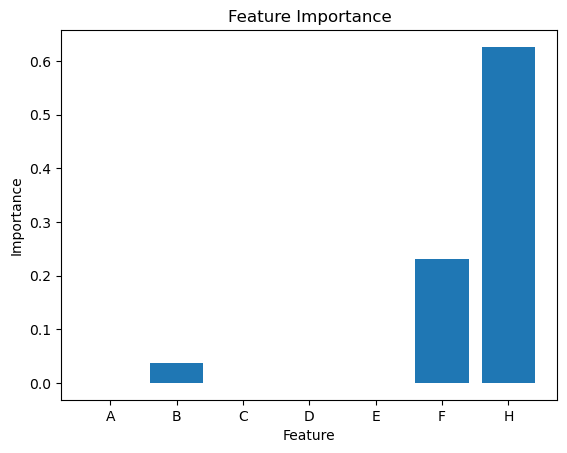

In [22]:
from sklearn.inspection import permutation_importance

# fit the model
best_estimator.fit(X_train, y_train)

# calculate the permutation importance
result = permutation_importance(best_estimator, X_test, y_test, n_repeats=10, random_state=0)

# get the importance of each feature
importance = result.importances_mean

feature_names=["A","B","C","D","E","F","H"]
df_train = pd.DataFrame(X_train, columns=feature_names)
plt.bar(df_train.columns, importance)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1545 entries, 0 to 1544
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ENERGYSTARScore      1545 non-null   float64
 1   NumberofBuildings    1545 non-null   float64
 2   YearBuilt            1545 non-null   int64  
 3   NumberofFloors       1545 non-null   int64  
 4   PropertyGFAParking   1545 non-null   int64  
 5   SiteEnergyUse(kBtu)  1545 non-null   float64
 6   TotalGHGEmissions    1545 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 84.6 KB
